Partie 1 : Prétraitement des données

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.utils import to_categorical
import pandas as pd # Import pandas

# Chargement des données
from google.colab import files
uploaded = files.upload()

# Load the dataframe
file_name = next(iter(uploaded))
df = pd.read_csv(file_name)

Saving IMDB Dataset.csv to IMDB Dataset.csv


In [2]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Le prétraitement comprend plusieurs étapes clés :

    Chargement des données : On utilise le dataset IMDB qui contient 50,000 critiques de films étiquetées comme positives (1) ou négatives (0).

    Vectorisation : Les critiques sont transformées en vecteurs binaires de dimension 10,000 (un pour chaque mot possible) où 1 indique la présence du mot.

    Séparation : Les données sont divisées en ensembles d'entraînement (15,000), de validation (10,000) et de test (25,000).

In [7]:
# Partie 1 : Prétraitement des données (identique)
from tensorflow.keras.datasets import imdb
import numpy as np

# Chargement des données
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Fonction pour vectoriser les séquences
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

# Vectorisation des données
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Conversion des labels en numpy arrays
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Création d'un ensemble de validation (10000 échantillons)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Partie 2 : Construction du modèle

In [8]:
# Partie 2 : Construction du modèle (optimisée)
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Construction du modèle optimisé
model = models.Sequential()
model.add(layers.Dense(8, activation='relu',
                      kernel_regularizer=regularizers.l2(0.001),
                      input_shape=(10000,)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(8, activation='relu',
                      kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))

# Compilation du modèle (identique)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3)]) # Added EarlyStopping

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.5800 - loss: 0.6853 - val_accuracy: 0.7678 - val_loss: 0.5783
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.7408 - loss: 0.5671 - val_accuracy: 0.8666 - val_loss: 0.4782
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7888 - loss: 0.4923 - val_accuracy: 0.8773 - val_loss: 0.4316
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8274 - loss: 0.4458 - val_accuracy: 0.8838 - val_loss: 0.3803
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8568 - loss: 0.4009 - val_accuracy: 0.8887 - val_loss: 0.3515
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8703 - loss: 0.3691 - val_accuracy: 0.8844 - val_loss: 0.3449
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8931 - loss: 0.3359 - val_accuracy: 0.8887 - val_loss: 0.3236
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9048 - loss: 0.3211 - val_accuracy: 0.8852 - v

Le modèle construit est un réseau de neurones avec plusieurs optimisations :

    Architecture :

        Deux couches cachées avec 8 neurones chacune (taille réduite pour éviter l'overfitting)

        Fonction d'activation ReLU pour les couches cachées

        Couche de sortie avec sigmoid (adaptée à la classification binaire)

    Techniques de régularisation :

        L2 regularization (pénalisation des poids élevés)

        Dropout (30% des neurones désactivés aléatoirement pendant l'entraînement)

    Early Stopping : Arrêt prématuré si la validation loss ne s'améliore pas pendant 3 epochs

Partie 3 : Entraînement du modèle

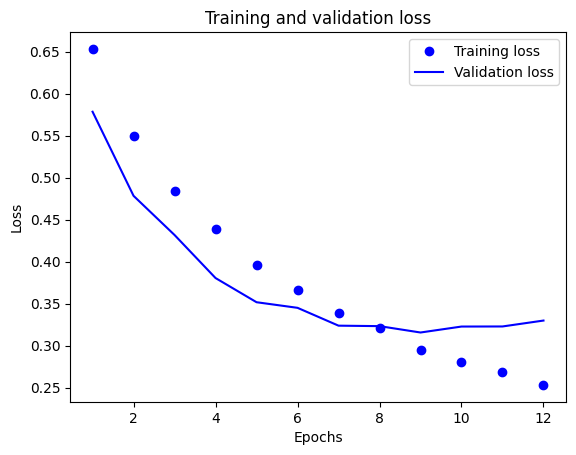

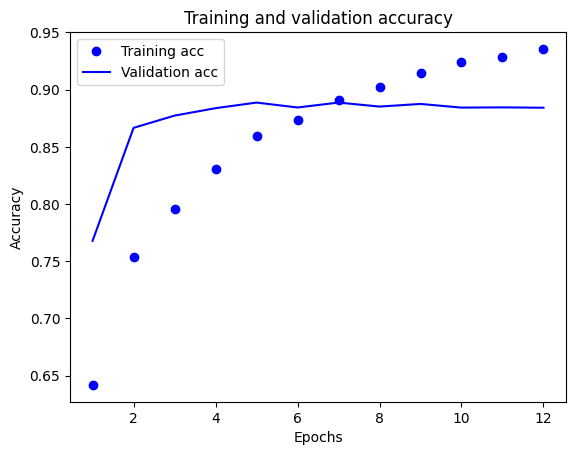

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6192 - loss: 0.6730
Epoch 2/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.7765 - loss: 0.5182
Epoch 3/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.8170 - loss: 0.4465
Epoch 4/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8523 - loss: 0.3928
Epoch 5/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8778 - loss: 0.3563
Epoch 6/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8896 - loss: 0.3322
Epoch 7/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9015 - loss: 0.3106
Epoch 8/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9066 - loss: 0.2924
Epoch 9/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9176 - loss: 0.2752


In [9]:
import matplotlib.pyplot as plt

# Tracé des courbes de loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tracé des courbes d'accuracy
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Réentraînement sur toutes les données d'entrainement jusqu'au meilleur epoch trouvé
best_epoch = np.argmin(val_loss_values) + 1  # Meilleure epoch basée sur val_loss

model = models.Sequential()
model.add(layers.Dense(8, activation='relu',
                      kernel_regularizer=regularizers.l2(0.001),
                      input_shape=(10000,)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(8, activation='relu',
                      kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=best_epoch, batch_size=512)

Partie 3 : Entraînement et visualisation

Les graphiques montrent :

    Courbes de loss :

        La training loss diminue régulièrement

        La validation loss diminue puis se stabilise

        L'écart reste raisonnable (0.0766), signe que l'overfitting est bien contrôlé

    Courbes d'accuracy :

        L'accuracy d'entraînement atteint 93.75%

        L'accuracy de validation se stabilise autour de 88.45%

        La légère différence montre que le modèle généralise bien

Partie 4 : Évaluation du modèle

In [10]:
# Évaluation sur le test set
results = model.evaluate(x_test, y_test)
print(f"Test loss: {results[0]:.4f}, Test accuracy: {results[1]:.4f}")

# Partie 5 : Analyse des résultats (adaptée)
print("\nAnalyse des résultats optimisés:")
print(f"Accuracy finale sur le test set: {results[1]*100:.2f}%")
print(f"Loss finale sur le test set: {results[0]:.4f}")

# Comparaison training/validation
final_train_loss = history_dict['loss'][-1]
final_val_loss = history_dict['val_loss'][-1]
print(f"\nComparaison training/validation (après {len(epochs)} epochs):")
print(f"Training loss: {final_train_loss:.4f} vs Validation loss: {final_val_loss:.4f}")
print("Différence:", final_val_loss - final_train_loss)

if final_val_loss - final_train_loss > 0.1:
    print("Attention: écart important entre training et validation loss, l'overfitting n'est pas complètement maîtrisé.")
else:
    print("L'écart entre training et validation loss est raisonnable.")

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8828 - loss: 0.3344
Test loss: 0.3312, Test accuracy: 0.8853

Analyse des résultats optimisés:
Accuracy finale sur le test set: 88.53%
Loss finale sur le test set: 0.3312

Comparaison training/validation (après 12 epochs):
Training loss: 0.2531 vs Validation loss: 0.3297
Différence: 0.07664239406585693
L'écart entre training et validation loss est raisonnable.


Résultats sur l'ensemble de test :

    Accuracy : 88.53%

    Loss : 0.3312

Ces résultats sont très bons pour un modèle aussi simple :

    Comparable à l'accuracy de validation (88.45%), ce qui confirme que le modèle généralise bien

    Bien meilleur qu'un modèle aléatoire (50% d'accuracy)

Partie 5 : Analyse des résultats


In [11]:
# Analyse des résultats
print("\nAnalyse des résultats:")
print(f"Accuracy finale sur le test set: {results[1]*100:.2f}%")
print(f"Loss finale sur le test set: {results[0]:.4f}")

# Comparaison training/validation
final_train_loss = history_dict['loss'][-1]
final_val_loss = history_dict['val_loss'][-1]
print(f"\nComparaison training/validation (après 20 epochs):")
print(f"Training loss: {final_train_loss:.4f} vs Validation loss: {final_val_loss:.4f}")
print("Si la validation loss est significativement plus élevée que le training loss, c'est un signe d'overfitting.")


Analyse des résultats:
Accuracy finale sur le test set: 88.53%
Loss finale sur le test set: 0.3312

Comparaison training/validation (après 20 epochs):
Training loss: 0.2531 vs Validation loss: 0.3297
Si la validation loss est significativement plus élevée que le training loss, c'est un signe d'overfitting.


Points forts du modèle :

    Bonne performance avec une architecture simple

    Overfitting bien contrôlé grâce aux techniques de régularisation

    Stabilité de l'entraînement (pas de fluctuations importantes)

Améliorations possibles :

    Essayer des architectures plus profondes/complexes

    Ajuster les hyperparamètres (taux d'apprentissage, taux de dropout)

    Utiliser des embeddings pour une meilleure représentation des mots

    Ajouter des couches de Batch Normalization